# Project: Communicate Data Findings 


## Table of Contents 

<a href="#T1"><b>Introduction </b></a>
   <li> <a href="#T1_1">Data Source </a></li>
   <li> <a href="#T1_2">Libraries </a></li>
<a href="#T2"><b>Data Wrangling </b></a>
    <li> <a href="#T2_1">Data Gathering </a></li>
    <li> <a href="#T2_2">Data Assessing </a></li>
    <li> <a href="#T2_3">Data Cleaning </a></li>
<a href="#T3"><b>Exploratory Visualization</b></a>
    <li> <a href="#T3_1">Univariate Exploration </a></li>
    <li> <a href="#T3_2">Bivariate Exploration </a></li>
    <li> <a href="#T3_3">Multivariate Exploration </a></li>

<a id ='T1'> </a>
# Introduction

This Jupyter Notebook contains sections of the exploration, starting from loading in the data, working through univariate visualizations, and ending with bivariate and multivariate exploration. 

<a id ='T1_1'> </a>
## 1. Data Source

* **Ford GoBike System Data:**  
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area ([Link](https://www.lyft.com/bikes/bay-wheels/system-data)).

* **Data Range:**  
Since the data after 04/2019 is showing as baywheels data and in different format, so we will request the data from \ from 04/2018 - 04/2019.

<a id ='T1_2'> </a>
## 2. Libraries

In [363]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import glob
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from sklearn.cluster import KMeans
import calendar  

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline


****
<a id ='T2'> </a>
# Data Wrangling
<a id ='T2_1'> </a>
## Data Gathering

In [156]:
# Get a list of year month name to bettwe embed to url 
data_range = ['2018' + str(x).zfill(2) for x in range(4,13)] + ['2019' + str(x).zfill(2) for x in range(1,5)]

# Loop over url to request data 
for ele in data_range:
    url = 'https://s3.amazonaws.com/baywheels-data/{}-fordgobike-tripdata.csv.zip'.format(ele)
    # Request Data 
    response = requests.get(url)
    
    # Save Data Zip data 
    with open('Data/{}-fordgobike-tripdata.csv.zip'.format(ele), mode ="wb") as file:
        file.write(response.content)

In [157]:
#loop over file names
files = [x for x in os.walk("./Data")][0][2]
for x in files:
    if ".zip" in x:
        with zipfile.ZipFile("./Data/{}".format(x),'r') as zip_ref:
            zip_ref.extractall("./Data")

In [158]:
all_filenames = [i for i in glob.glob('Data/*.csv')]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [161]:
combined_csv.to_csv('./Data/raw_data.csv', index = False)

<a id ='T2_2'> </a>
## Data Assessing

In [211]:
raw_data = pd.read_csv('./Data/raw_data.csv')

In [212]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421723 entries, 0 to 2421722
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 258.7+ MB


In [213]:
raw_data.shape

(2421723, 14)

In [214]:
raw_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,No
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,No
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,Yes
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,No
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,Yes


In [215]:
raw_data.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           12501
start_station_name         12501
start_station_latitude         0
start_station_longitude        0
end_station_id             12501
end_station_name           12501
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [216]:
raw_data.duplicated().sum()

0

**Quality**
- there are missing values in the station_id, station_name, end_station_name  ,end_station_id columns
- the columns 'start_time' and 'end_time' are not datetime type
- the columns 'start_station_id', 'end_station_id' and 'bike_id' are not object type

<a id ='T2_3'> </a>
## Data Cleaning

In [230]:
# Make a copy before cleaning 
bike_data = raw_data.copy()

- Remove missing values in station_id, station_name, end_station_name ,end_station_id columns since the missing values appear in those four columns in the same time

In [231]:
bike_data.dropna(subset=['start_station_id'], axis =0, inplace = True)

In [232]:
# Test If all the missing values have been removed 
assert bike_data.isnull().sum().max() ==0

- Change columns 'start_time' and 'end_time' to datetime type

In [233]:
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [234]:
# Test if the Start time and end time columns have changed to dateype 
assert (is_datetime(bike_data['end_time']) and is_datetime(bike_data['start_time'])) == True

- Change the columns 'start_station_id', 'end_station_id' and 'bike_id' to string type

In [239]:
columns_to_obj = ['start_station_id','end_station_id','bike_id'] 
for col in columns_to_obj:
    bike_data[col]= bike_data[col].astype(int)
    bike_data[col]= bike_data[col].astype(str)

In [256]:
# Test if all the three columns have been converted to string type 
assert all([bike_data[col].dtype == object  for col in  columns_to_obj ])== True

In [261]:
#export the cleaned csv 
bike_data.to_csv("Data/cleaned_bike_data.csv", index = False)

**** 
<a id ='T3'> </a>
# Exploratory Visualization 

In [262]:
df = pd.read_csv("Data/cleaned_bike_data.csv")

In [264]:
# Datatype change 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

columns_to_obj = ['start_station_id','end_station_id','bike_id'] 
for col in columns_to_obj:
    df[col]= df[col].astype(int)
    df[col]= df[col].astype(str)

<a id ='T3_1'> </a>
## Univariate Exploration

**How long are people riding these bikes?** 

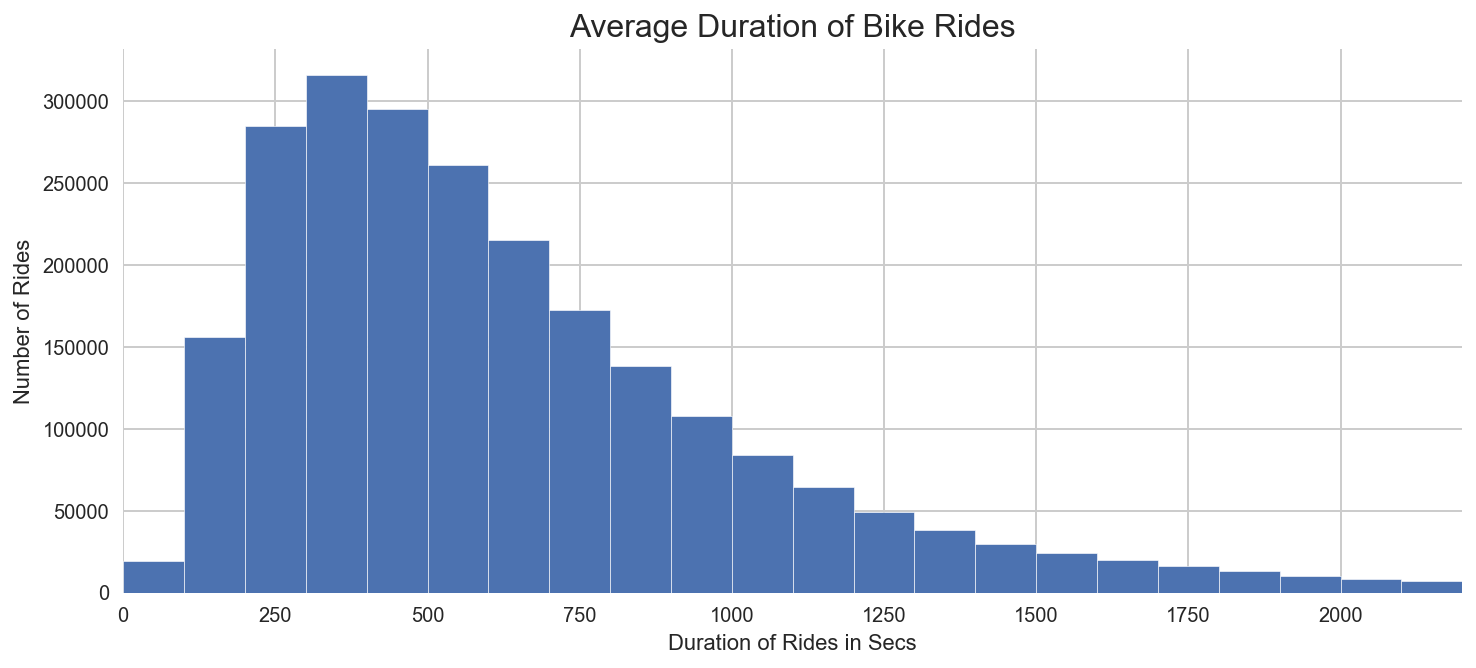

In [367]:
#Visualizing the data in a histogram
plt.figure(figsize= (12,5))
duration_bins = np.arange(0, df['duration_sec'].max() + 200, 100)
plt.hist(data = df, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2200);
plt.style.use('seaborn')
plt.title('Average Duration of Bike Rides', fontsize = 16);
plt.xlabel('Duration of Rides in Secs');
plt.ylabel('Number of Rides');
plt.style.use('seaborn');

- In this analysis we'd like to see the distribution of people riding bikes in secs. Since the distribution is right skewed here we set the top limit of 2200 secs to remove some outliers with extremely long riding time.   
- We can see tha the peak usesage falls in 250-740 secs which is around 4.5mins, so generally speaking, people like to use gobike for short routes. 

<a id ='T3_2'> </a>
## Bivariate Exploration

**When are most trips taken in terms of day of the week?**

In [301]:
df['start_weekday'] = df['start_time'].apply(lambda x: calendar.day_name[x.weekday()])
df['start_month'] = df['start_time'].apply(lambda x: x.month)
df['start_day'] = df['start_time'].apply(lambda x: x.day)
df['start_hour'] = df['start_time'].apply(lambda x: x.hour)
# Create ordinal of weekday 
ordinal_weekday= ['Monday', 'Tuesday','Wednesday',  'Thursday' ,'Friday','Saturday','Sunday']
week_classes = pd.api.types.CategoricalDtype(ordered= True, categories = ordinal_weekday)
df['start_weekday'] = df['start_weekday'].astype(week_classes)

In [322]:
df_weekday = df.start_weekday.value_counts().reset_index(name = "count").rename()

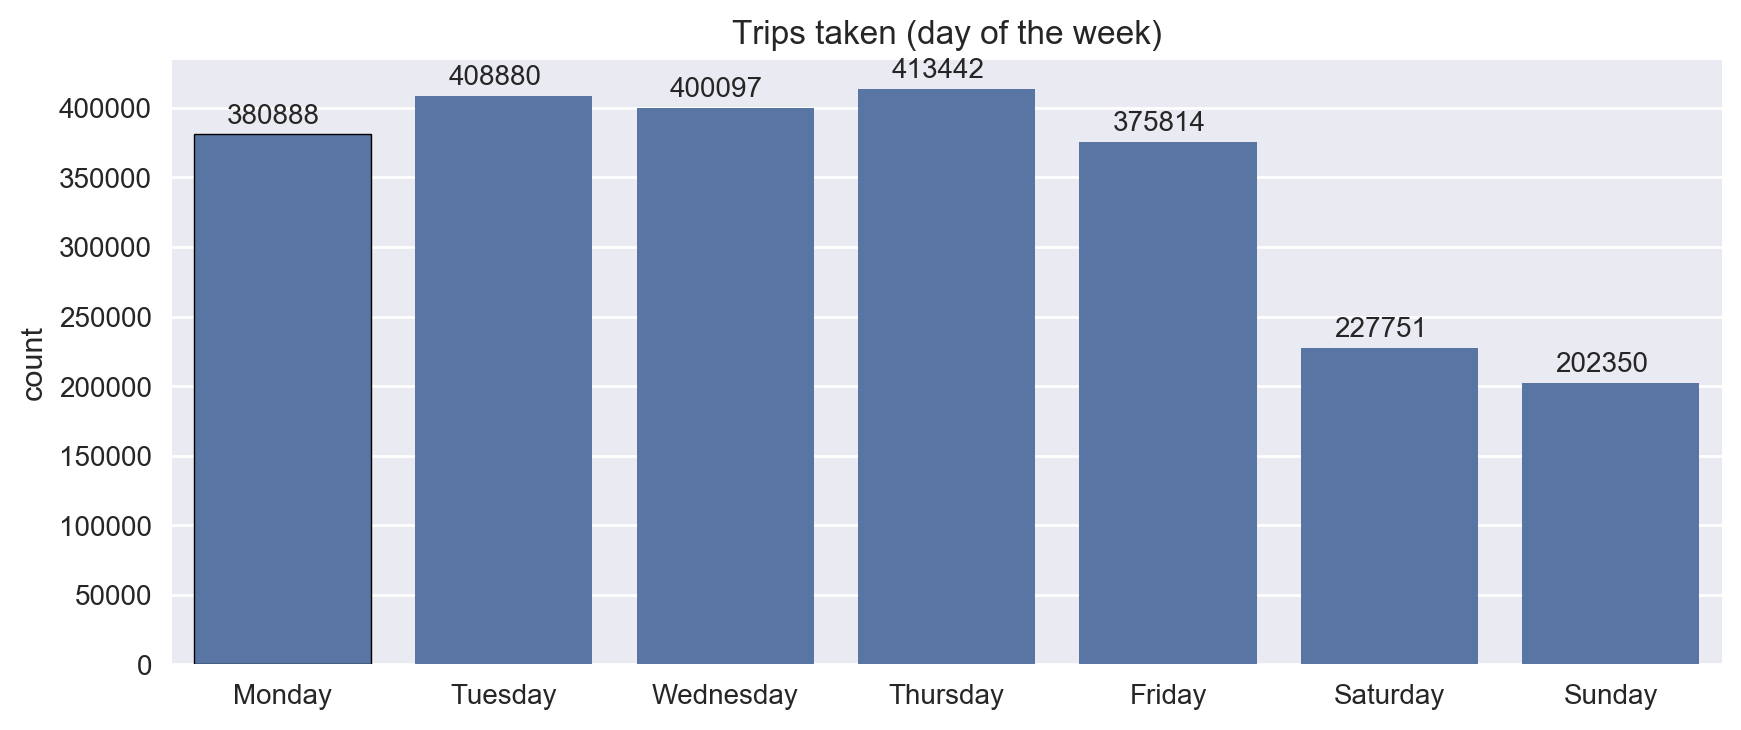

In [370]:
fig, axes = plt.subplots(figsize = (10,4), dpi = 100)
sns.barplot(data = df_weekday, x= 'index',y='count', color= sns.color_palette()[0],lw = 0.5, edgecolor = "black")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis()
cur_axes.axes.get_xaxis().set_label_text('')
sns.despine(fig, left = True)

for p in axes.patches:
    axes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+ 8000))

plt.title('Trips taken (day of the week)'); 

- We can see from the plot that Tuesday to Friday has the most trips taken, followed by Monday and Friday. Trips in  Saturday and Sunday are approximately half of the rides than in weekdays. 

**When are most trips taken in terms of time of the day?**

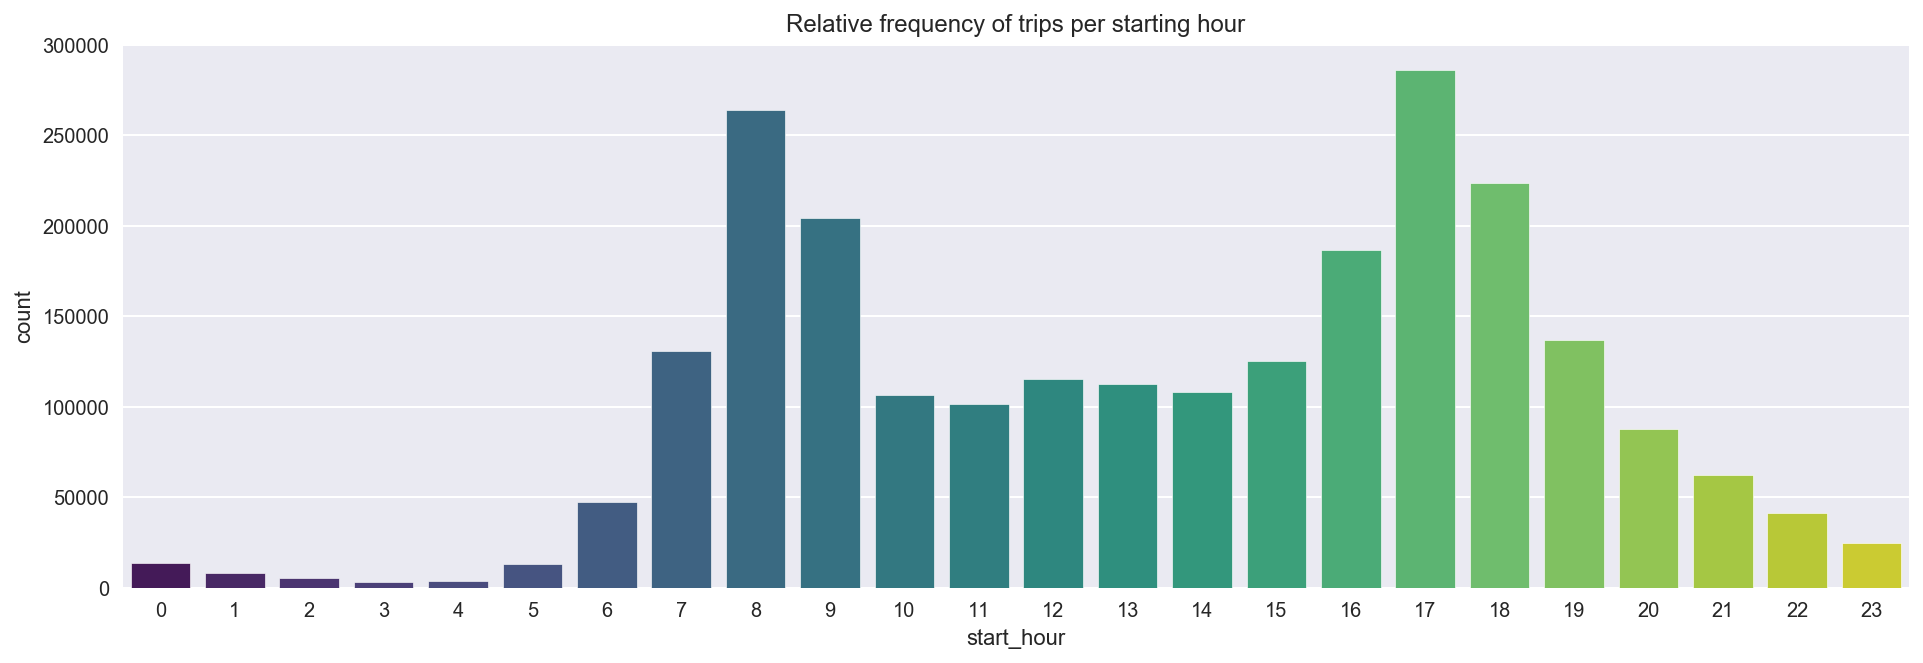

In [472]:
fig, ax = plt.subplots(figsize = (16,5))
sns.countplot(x = "start_hour", data = df, palette = "viridis")
plt.title("Relative frequency of trips per starting hour");

The most frequent starting hours are at commute peak time 8 and at 17. Lets see if this pattern is specially for weekday. 

In [473]:
# create bins and cut the hours into 6 bins 
bin_hour = 4
bins_edges = np.arange(0, df['start_hour'].max()+bin_hour , bin_hour)
df['start_hour_binned'] = pd.cut(df['start_hour'], bins_edges, include_lowest = True)

In [522]:
# create a dataframe with grouped by start_hour_binned and start_weekday 
df_grouped_hr = df.groupby(['start_hour_binned','start_weekday']).size().reset_index(name='count')
df_grouped_hr.start_hour_binned = df_grouped_hr.start_hour_binned.astype(str)

In [523]:
# clean up the hour bin infromation 
df_grouped_hr.start_hour_binned =\
df_grouped_hr.start_hour_binned.apply(lambda x: x.split(",")[0].strip('()').strip('.').replace(".0","")) + '-'+\
df_grouped_hr.start_hour_binned.apply(lambda x: x.split(",")[1].strip('(] ').strip('.').replace(".0",""))

df_grouped_hr.loc[df_grouped_hr.start_hour_binned =='-001-4','start_hour_binned'] = "0-4"

In [529]:
# create a pivot table to create heatmap 
heatmap_df = df_grouped_hr.pivot(index = 'start_hour_binned', columns ='start_weekday', values= 'count')

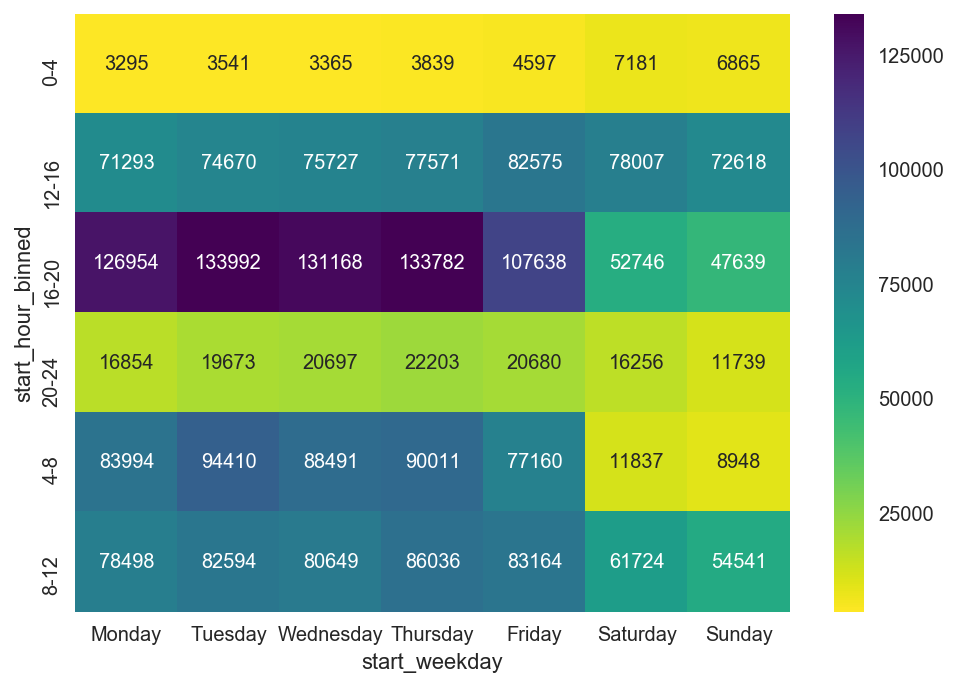

In [542]:
sns.heatmap(heatmap_df,
            # add annotation 
            annot = True, 
            # all the counts are listed as decimal values can use fmt ='.0f' if we have any cells with no counts
            fmt = 'd', cmap ='viridis_r');

- We can see that oveall people turns to take rides more on Weekday commute time (16-20pm and 8:12am). This pattern is not that obvious during weekend. 

<a id ='T3_3'> </a>
## Multivariate Exploration

Now, lets introduce another variable user_type to see if user have different ride habit of in case of the riding duration in different month.

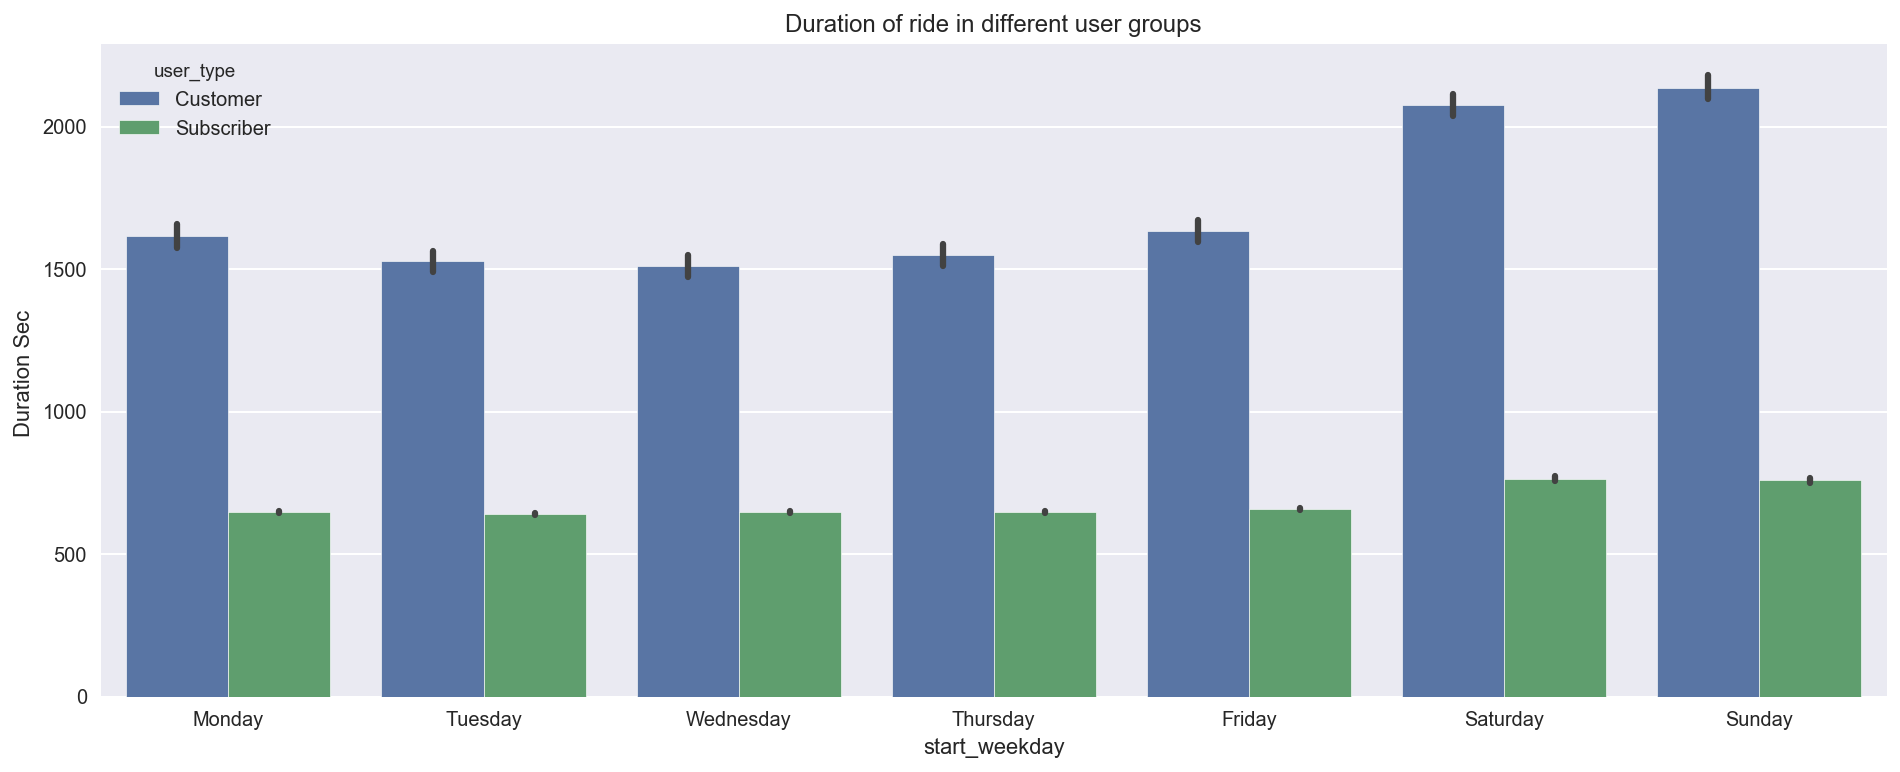

In [568]:
plt.figure(figsize =(16,6)) 
base_color = sns.color_palette()[0]
sns.barplot(data= df, x ='start_weekday', y='duration_sec', hue ='user_type' )  
plt.ylabel("Duration Sec ")
plt.title("Duration of ride in different user groups");

- We can see that most compared to non-subscribed customer group, the subscribed customer group turns to have ride in slight difference of each day of week and the average ride time is lower. 

**Can we find any patterns in terms of month?**

In [571]:
df['year_month'] = df.start_time.apply(lambda x: str(x)[:6])

In [ ]:
sns.pointplot(data = df.sort_values(by='year_month'), x = 'year_month', y = 'bike_id',
             hue = 'user_type', palette = 'muted', ci = None);
plt.title('Number of Rides in Subscribed vs Non-subscribed customer Over Time', fontsize = 14)
plt.legend(title = 'User Type')
plt.xlabel('Months Over Time')
plt.ylabel('Number of Rides');